0) Importer les librairies classiques : numpy, pandas, seaborn et matplolib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

1) Lire le fichier courbey(x).csv avec pandas

In [4]:
datas = pd.read_csv('courbey(x).csv', sep=";")

2) Pour chaque colonne dans le tableau de données, donner le nombre d'éléments, les valeurs max, min

In [11]:
print(datas.max())
print(datas.size)
print(len(datas['x']))

x    2.903744
y    9.515817
dtype: float64
200
100


3) Tracer x et y en fonction de la position dans le tableau. Tracer y(x), sous forme de nuage de points

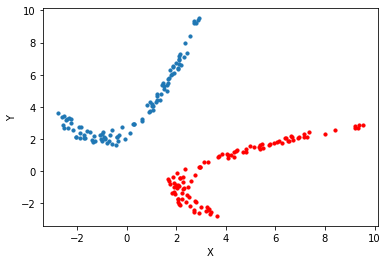

In [39]:
X = datas.values[:, 0]
Y = datas.values[:, 1]

plt.scatter(X, Y, s=10)
plt.scatter(Y, X, s=10, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

4) Appliquer aux données un modèle de régression linéaire afin de tracer la droite de régression. (Remarque: Utiliser reshape)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_datas, test_datas = train_test_split(datas.values, test_size=int(0.2*len(datas['x'])))

X_train = [train_datas[i][0] for i in range(len(train_datas))]
Y_train = [train_datas[i][1] for i in range(len(train_datas))]
X_test = [test_datas[i][0] for i in range(len(test_datas))]
Y_test = [test_datas[i][1] for i in range(len(test_datas))]

x_train = np.reshape(X_train, (-1, 1))
y_train = np.reshape(Y_train, (-1, 1))
x_test = np.reshape(X_test, (-1, 1))
y_test = np.reshape(Y_test, (-1, 1))

model_linReg = LinearRegression()

model_linReg.fit(x_train, y_train)
precision = model_linReg.score(x_test, y_test)

print(precision*100)

63.63943123641509


5) Appliquer aux données un modèle de régression Polynomiale.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features_train = poly.fit_transform(x_train)
poly_features_test = poly.fit_transform(x_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features_train, y_train)

6) Calculer le score

In [28]:
precision = poly_reg_model.score(poly_features_test, y_test)
print(precision*100)

97.19972522017717


7) Tracer le nuage des points et tracer la courbe de prédiction. Remarque: il faut ordonner les valeurs de x et y

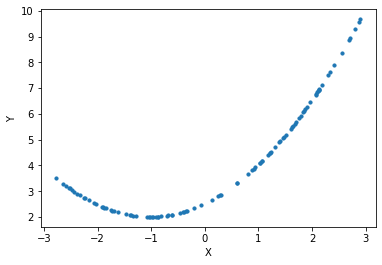

In [37]:
x = np.reshape(X, (-1, 1))
poly_features_x = poly.fit_transform(x)

y_predicted = poly_reg_model.predict(poly_features_x)

plt.scatter(poly_features_x[:, 0], y_predicted, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()